# LA-ConGA Physics 2022

# Módulo de Datos

Estudiante: Oscar, Altuve Pabón

Mattermost: @altuos
### Tarea 2. Ejercicio 1.

Utilizando el arreglo de puntos de la lámina 39:
1.	Construir una función $\chi^2(p_0,p_1)$ correspondiente a un modelo lineal $y=p_0+p_1x$;
2.	Asignar valores numéricos iniciales “razonables” a $p_0$ y $p_1$;
3.	Determinar (p.e. con una doble bucle) los valores $\hat{p_0}$ y $\hat{p_1}$ que minimizan la función $\chi^2$;
4.	Fijando el valor $\hat{p_0}$, graficar la variación de $\chi^2$ en función de $p_1$ alrededor de su valor mínimo;
5.	Fijando el valor de $\hat{p_1}$, graficar la variación de $\chi^2$ en función de $p_0$ alrededor de un valor mínimo;
6.	En ambos casos, determinar los intervalos correspondientes a $\Delta\chi^2<1$;
7.	Comparar con el resultado indicado en la lámina siguiente;
8.	Evaluar la p-value, e interpretar su valor;
9.	Comparar con el resultado producido por tu herramienta favorita, e interpretar las posibles diferencias.

In [1]:
#include<TFile.h>
#include<TH1.h>
#include<TMath.h>
#include<math.h>
#include<TF1.h>
#include<TLine.h>
#include<TPoint.h>
#include<iostream>
#include<string>
#include<stdio.h>

In [2]:
gStyle->SetOptTitle (0/1); // sin título
gStyle->SetOptStat(0); // No muestra estadística
gStyle->SetPalette(1); // Cambia la paleta de colores en los plots.

// Distancia entre el eje y el título del eje
gStyle->SetTitleYOffset(0.8);

// Tamaño de título y etiquetas de los ejes X, Y y Z
gStyle->SetLabelSize(0.04,"XYZ");
gStyle->SetTitleSize(0.04,"XYZ");

In [3]:
TCanvas *c1 = new TCanvas("c1","c1",10,10,900,600);
c1->SetGrid();

In [4]:
TH1D *h_data = new TH1D("h_data","h_data",10,0,10);

In [5]:
h_data->SetBinContent(1, 157);
h_data->SetBinContent(2, 135);
h_data->SetBinContent(3, 121);
h_data->SetBinContent(4, 104);
h_data->SetBinContent(5, 86);
h_data->SetBinContent(6, 71);
h_data->SetBinContent(7, 83);
h_data->SetBinContent(8, 90);
h_data->SetBinContent(9, 67);
h_data->SetBinContent(10, 86);

In [6]:
// https://root.cern/root/html534/tutorials/math/chi2test.C.html

In [7]:
float line(float xi, float p0, float p1) {
    return p0+p1*xi;
}

In [8]:
float chi(float xi, float yi, int n, float p0, float p1) {
    return pow((yi-line(xi,p0,p1))/TMath::Sqrt(yi),2);
}

In [9]:
float p0 = 1.34861e+02;
float p1 = -7.43446e+00;
int n = h_data->TH1::GetNbinsX();
int NDF = n-2; // -2 porque son 2 parámetros.

In [10]:
float chi_2 = 0;
for (int i = 0; i < n; i++) {
    chi_2 += chi(h_data->TH1::GetBinCenter(i+1),h_data->TH1::GetBinContent(i+1),n,p0,p1);
}

cout << "Para un Chi^2 = " << chi_2 << ", con NDF = " << NDF
     << ". Se tiene una Probabilidad = " << TMath::Prob(chi_2,NDF) << endl;

Para un Chi^2 = 23.1088, con NDF = 8. Se tiene una Probabilidad = 0.00322728


### Los resultados corresponden a los mostrados en la slide 44 de la clase.

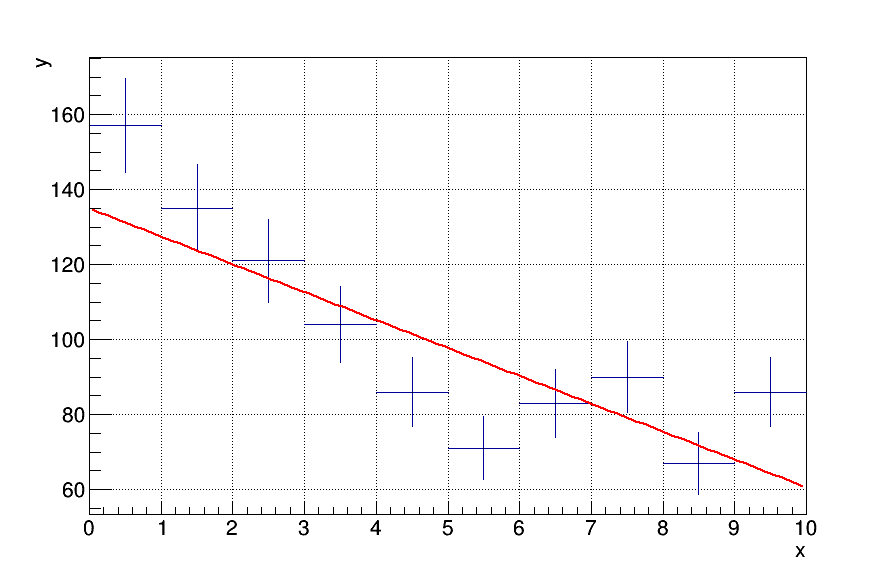

In [11]:
TF1 *myline = new TF1("myline","line(x,[0],[1])",0,10);
myline->SetParameters(p0,p1);
h_data->GetXaxis()->SetTitle("x");
h_data->GetYaxis()->SetTitle("y");
h_data->Draw("e");
myline->Draw("same");
c1->Draw();

In [12]:
Float_t stepp0 = 0.5;
Float_t stepp1 = 0.25;
Float_t minVal = 105;
Float_t maxVal = 165;

binp0 = int((150-minVal)/stepp0);
binp1 = int(10./stepp1);
chi2dPlot = new TH2D("chi2dPlot","chi2dPlot",binp0,minVal-stepp0/2.0,maxVal-stepp0/2.0,binp1,-14,-1);

cout << "Número de bins p0: " << binp0 << endl
     << "Número de bins p1: " << binp1 << endl;

Número de bins p0: 90
Número de bins p1: 40


In [13]:
//this is for the chi2 on p0 and p1
chi2dPlot->Clear();
for (Float_t p_0 = minVal; p_0 < maxVal; p_0+=stepp0){
    for (double p1 = -14; p1 < -1; p1+=stepp1){
        for (Int_t j=0; j<1; j++) myline->ReleaseParameter(j);
        myline->FixParameter(0,p_0);
        myline->FixParameter(1,p1);
        float chi_2 = 0;
        for (int i = 0; i < n; i++) {
            chi_2 += chi(h_data->TH1::GetBinCenter(i+1),h_data->TH1::GetBinContent(i+1),n,p_0,p1);
        }
        chi2dPlot->SetBinContent(chi2dPlot->FindBin(p_0,p1),chi_2);
    }
}

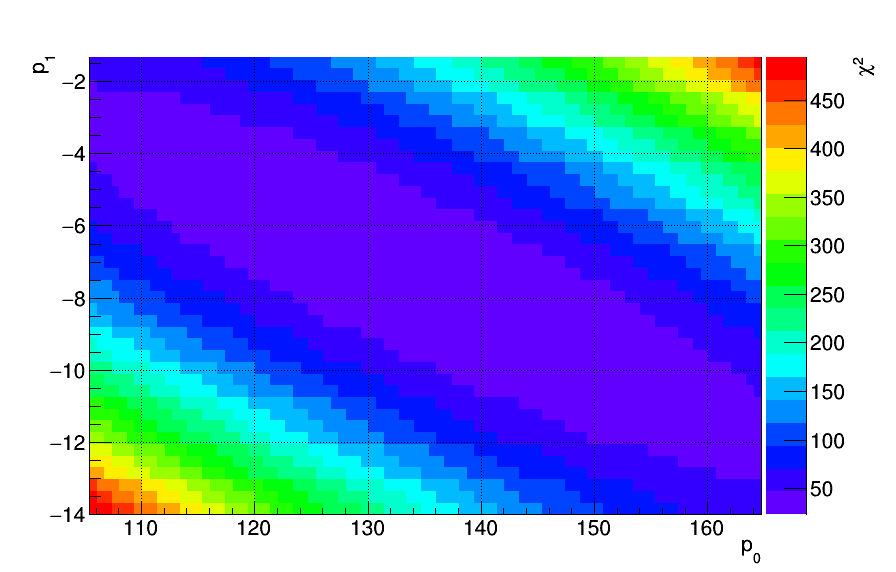

In [14]:
//remove borders..
chi2dPlot->SetAxisRange(-14,-1-stepp0,"y");
chi2dPlot->SetAxisRange(minVal+stepp0,maxVal-stepp0,"x");
c1->SetRightMargin(0.15);
chi2dPlot->GetXaxis()->SetTitle("p_{0}");
chi2dPlot->GetYaxis()->SetTitle("p_{1}");
chi2dPlot->GetZaxis()->SetTitle("#chi^{2}");
chi2dPlot->Draw("colz");
c1->Draw();

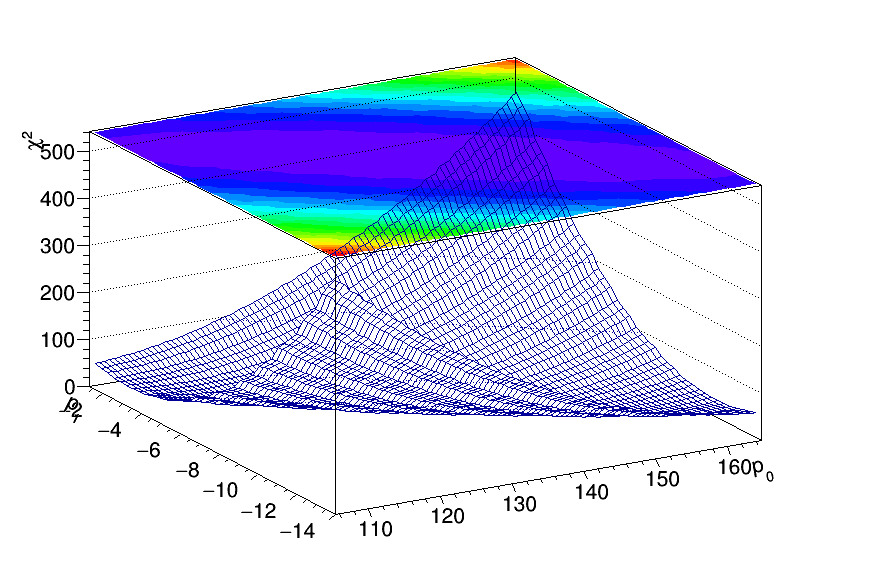

In [15]:
//chi2dPlot->Draw("surf2");
chi2dPlot->Draw("surf3");
c1->Draw();

### Utilizando algoritmos prediseñados de ROOT:

Primero diseñamos la función de la recta:

In [16]:
f_line = new TF1("f_line","[0]+[1]*x",0,10);

Hacemos un ajuste de $\chi^2$ sobre los datos y calculamos la probabilidad:

In [17]:
h_data->Fit("f_line","S");
cout << endl << "Para un Chi^2 = " << f_line->GetChisquare() << ", con NDF = " << f_line->GetNDF()
     << ". Se tiene una Probabilidad = " << TMath::Prob(f_line->GetChisquare(),f_line->GetNDF()) << endl;

 FCN=23.1088 FROM MIGRAD    STATUS=CONVERGED      31 CALLS          32 TOTAL
                     EDM=2.02734e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.34861e+02   7.02278e+00   7.32657e-03   2.42454e-12
   2  p1          -7.43446e+00   1.13342e+00   1.18245e-03   3.00454e-11

Para un Chi^2 = 23.1088, con NDF = 8. Se tiene una Probabilidad = 0.00322728


In [18]:
TCanvas *c2 = new TCanvas("c2","c2",10,10,900,600);
c2->SetGrid();

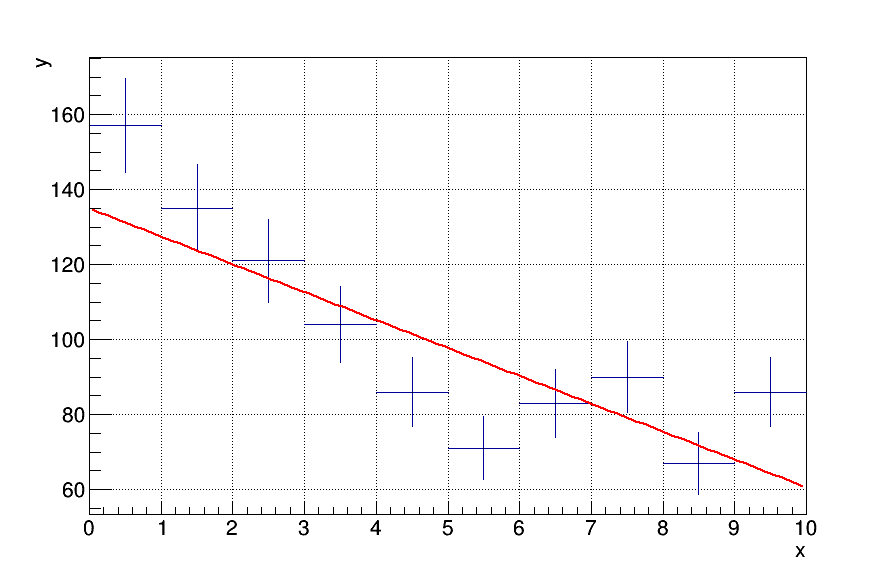

In [19]:
h_data->GetXaxis()->SetTitle("x");
h_data->GetYaxis()->SetTitle("y");
h_data->Draw("e");
c2->Draw();

In [20]:
//this is for the chi2 on p0 and p1
chi2dPlot->Clear();
for (Float_t p0 = minVal; p0 < maxVal; p0+=stepp0){
    for (double p1 = -14; p1 < -1; p1+=stepp1){
        for (Int_t j=0; j<1; j++) myline->ReleaseParameter(j);
        myline->FixParameter(0,p0);
        myline->FixParameter(1,p1);
        h_data->Fit("myline","Q");
        chi2dPlot->SetBinContent(chi2dPlot->FindBin(p0,p1),myline->GetChisquare());
    }
}

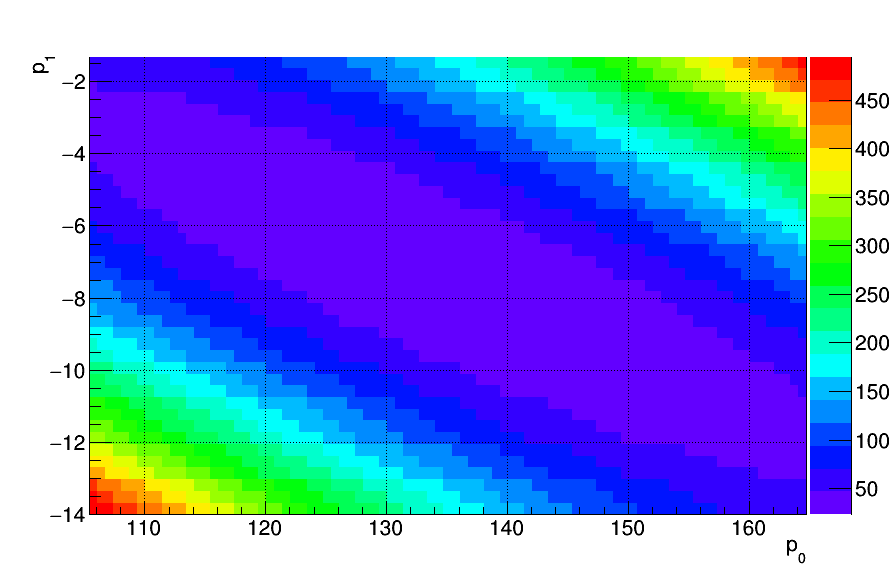

In [21]:
// remove borders..
chi2dPlot->Draw("colz");
c2->Draw();

### Los resultados corresponden a los realizados sin el código prediseñado por ROOT mostrados arriba.